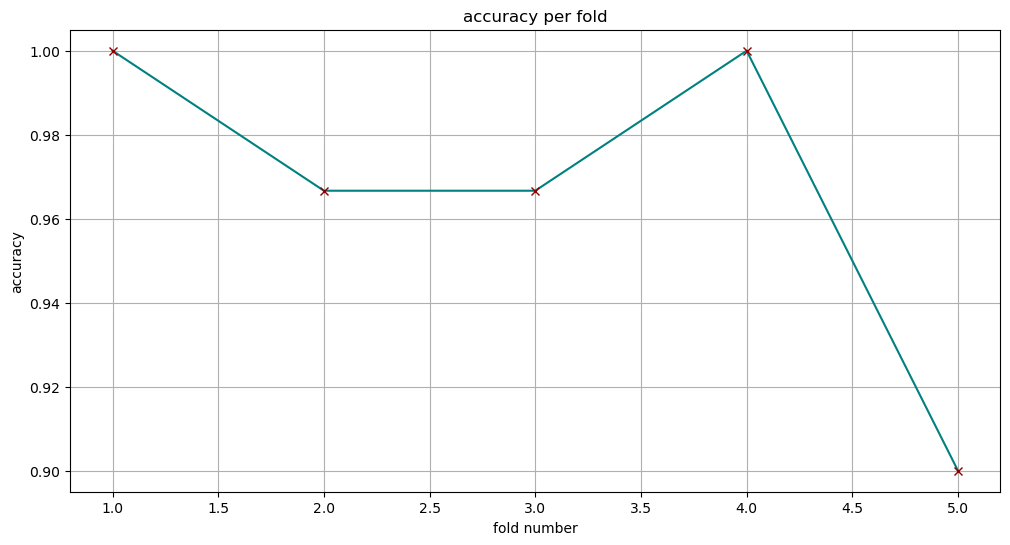

In [19]:
# 1
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression

# Load data
iris = load_iris()
x = iris.data
y = iris.target

# Set up LogisticRegression model
model = LogisticRegression(max_iter=200)

# Set up the KFold cross-validations
kf = KFold(n_splits=5, shuffle=True)

# Perform cross-validation
scores = cross_val_score(model, x, y, cv=kf)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(scores) + 1), scores, marker='x', color='teal', markeredgecolor='darkred')
plt.xlabel('fold number')
plt.ylabel('accuracy')
plt.title('accuracy per fold')
plt.xticks()
plt.grid()
plt.show(range(1, len(scores) + 1))

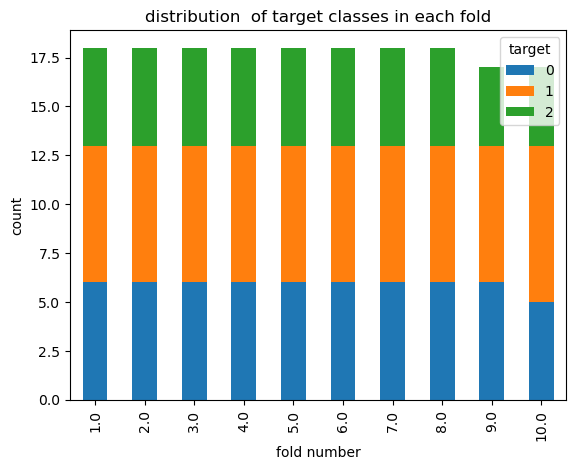

In [6]:
# 2
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Load data
wine = load_wine()
x = wine.data
y = wine.target

# Convert to DataFrame for easier manupulation
df = pd.DataFrame(x, columns=wine.feature_names)
df['target'] = y

# Set up StratifiedKFold
stf_kfold = StratifiedKFold(n_splits=10, shuffle=True)

# Set up DecisionTreeClassifier
model = DecisionTreeClassifier()

# Perform cross-validation
scores = cross_val_score(model, x, y, cv=stf_kfold)

# Plot the distribution of target classes in each fold
fig, ax = plt.subplots()
for i, (train_index, test_index) in enumerate(stf_kfold.split(x, y), 1):
    df.loc[test_index, 'Fold'] = i
df.pivot_table(index='Fold', columns='target', aggfunc='size').plot(kind='bar', stacked=True, ax=ax)
ax.set_title('distribution  of target classes in each fold')
ax.set_xlabel('fold number')
ax.set_ylabel('count')
plt.show()

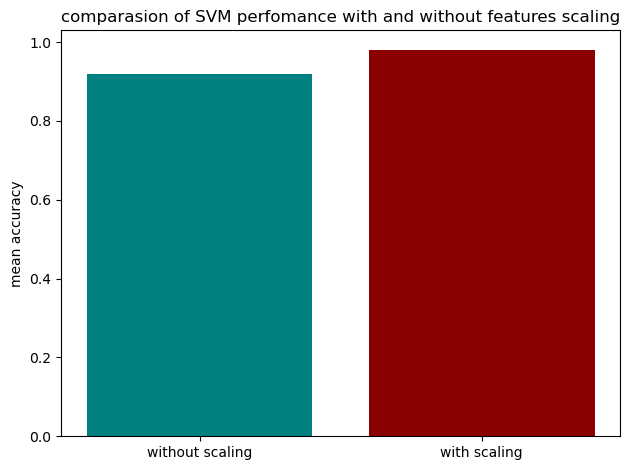

In [10]:
# 3
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Load data
breast = load_breast_cancer()
x = breast.data
y = breast.target

# Set up StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True)

# Without scaling
model1 = SVC()
scores1 = cross_val_score(model1, x, y, cv=skf)

# With feature scalling
model2 = make_pipeline(StandardScaler(), SVC())
scores2 = cross_val_score(model2, x, y, cv=skf)

# Plot the comparasion results
fix, ax = plt.subplots()
ax.bar(['without scaling', 'with scaling'], [np.mean(scores1), np.mean(scores2)], color=['teal', 'darkred'])
ax.set_ylabel('mean accuracy')
ax.set_title('comparasion of SVM perfomance with and without features scaling')
plt.tight_layout()
plt.show()

mean squared error: 3001.75284699943


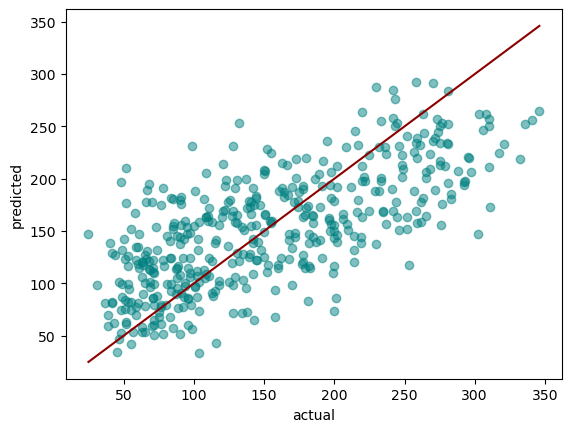

In [47]:
# 4
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error

# Load data
diabetes = load_diabetes()
x = diabetes.data
y = diabetes.target

# Configure LeaveOneOut cross-validation
loo = LeaveOneOut()
y_true, y_pred = [], []

# Perform LOOCV
for train_index, test_index in loo.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred.append(model.predict(x_test)[0])
    y_true.append(y_test[0])

# Calculate the mean squared error
mse = mean_squared_error(y_true, y_pred)
print(f'mean squared error: {mse}')

# Plot actual vs predicted values
plt.scatter(y_true, y_pred, alpha=0.5, color='teal')
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='darkred') # reference line
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

best parameters: {'n_neighbors': 5, 'weights': 'distance'}
best cross-validation score: 0.99


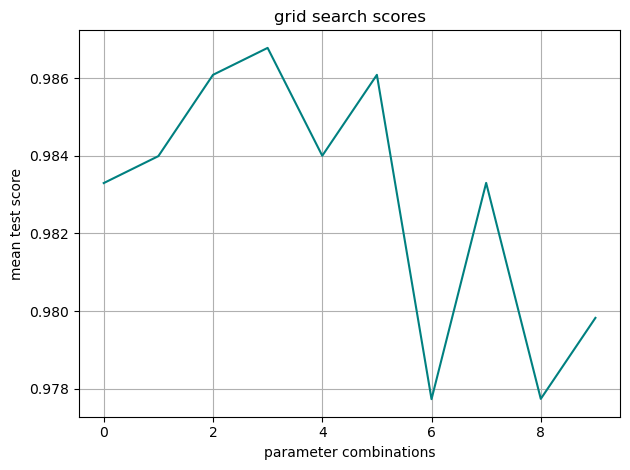

In [21]:
# 5
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier

# Load data
digits = load_digits()
x = digits.data
y = digits.target

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Set up the parameters for grid search
param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}

# Creater KNN model
knn = KNeighborsClassifier()

# Configure GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Perform GridSearchCV
grid_search.fit(x_train, y_train)

# Best parameters and best score
print('best parameters:', grid_search.best_params_)
print('best cross-validation score: {:.2f}'.format(grid_search.best_score_))

# Plot
scores = grid_search.cv_results_['mean_test_score']
plt.plot(range(len(scores)), scores, color='teal')
plt.xlabel('parameter combinations')
plt.ylabel('mean test score')
plt.title('grid search scores')
plt.grid(True)
plt.tight_layout()
plt.show()

outer cv scores: [0.74500807 0.71120455 0.73410693 0.72972024 0.7176948 ]
mean of outer cv scores: 0.727546916010286


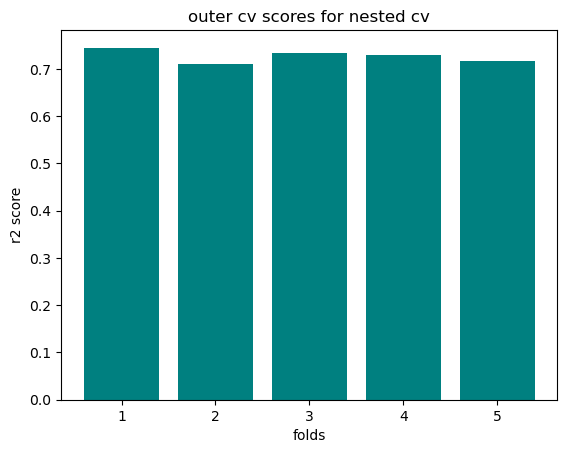

In [55]:
# 6
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

# Load data
breast = load_breast_cancer()
x = breast.data
y = breast.target

# Configure the outer cv
outer_cv = KFold(n_splits=5, shuffle=True)

# Nested cv with parameter tuning
param_grid = {'alpha': np.logspace(-4, 4, 10)}
model = Ridge()

inner_cv = KFold(n_splits=5, shuffle=True)
clf = GridSearchCV(estimator=model, param_grid=param_grid, cv=inner_cv)

outer_scores = cross_val_score(clf, x, y, cv=outer_cv)

print('outer cv scores:', outer_scores)
print('mean of outer cv scores:', np.mean(outer_scores))

# Visualize outer cv scores
plt.bar(range(1, len(outer_scores) + 1), outer_scores, color='teal')
plt.title('outer cv scores for nested cv')
plt.xlabel('folds')
plt.ylabel('r2 score')
plt.show()

In [ ]:
# 7
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load data
data = pd.read_csv('path', parse_dates=['date_column'], index_col=['dates_column'])
x = data.index.to_julian_date().values.reshape(-1, 1) # Convert dates to ordinal
y = data['values_column'].values

# Configure TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

fig, ax = plt.subplots()
for train_index, test_index in tscv.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = LinearRegression()
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)

    mse = mean_squared_error(y_test, predictions)
    print(f'MSE for fold: {mse}')

    # Plot predictions against the actual values
    ax.plot(data.index[test_index], predictions, label=f'Fold {len(ax.lines) + 1}')
    ax.plot(data.index[test_index], y_test, label=f'test data fold {len(ax.line)}')

ax.set_title('time series cross-validation predictions')
ax.legend()
plt.show()

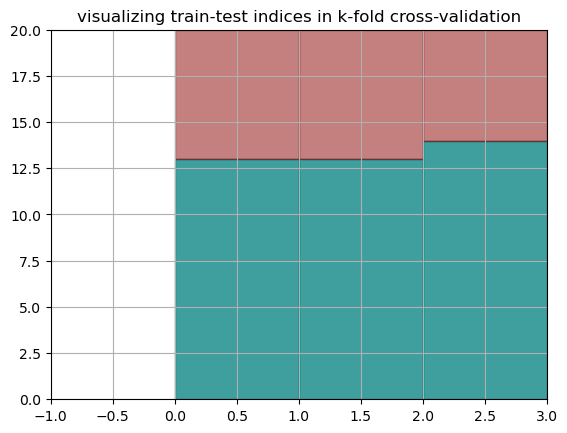

In [65]:
# 8
from sklearn.datasets import load_linnerud
from sklearn.model_selection import cross_val_score, KFold

# Load data
linnerud = load_linnerud()
df = pd.DataFrame(linnerud.data)

# Create KFold
kf = KFold(n_splits=3, shuffle=True)

fig, ax = plt.subplots()
for i, (train_index, test_index) in enumerate(kf.split(x), 1):
    ax.add_patch(plt.Rectangle((i - 1, 0), 1, len(train_index), color='teal', alpha=0.5))
    ax.add_patch(plt.Rectangle((i - 1, 0), 1, len(train_index), color='teal', alpha=0.5))
    ax.add_patch(plt.Rectangle((i - 1, len(train_index)), 1, len(test_index), color='darkred', alpha=0.5))

ax.set_xlim(-1, 3)
ax.set_ylim(0, len(x))
ax.set_title('visualizing train-test indices in k-fold cross-validation')
plt.grid(True)
plt.show()

In [ ]:
# 9
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Load data
url = 'https://archive.ics.uci.edu/ml/datasets/credit+card+fraud+detection' # 404 not found
data = pd.read_csv(url)

# Assuming 'Class' is the label column where fraud is marked as '1' (minority class)
x = data.drop('Class', axis-1)
y = data['Class']

# Configure stratified cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True)

# Instantiate the model
model = RandomForestClassifier(n_estimators=100)

# Perform stratified cross-validation
cv_scores = cross_val_score(model, x, y, cv=skf, scoring='accuracy')

# Plot results of each fold
plt.plot(cv_scores, labe='fold accuracy')
plt.xlabel('fold number')
plt.ylabel('accuracy')
plt.title('accuracy across folds in stratified cv')
plt.legend()
plt.show()

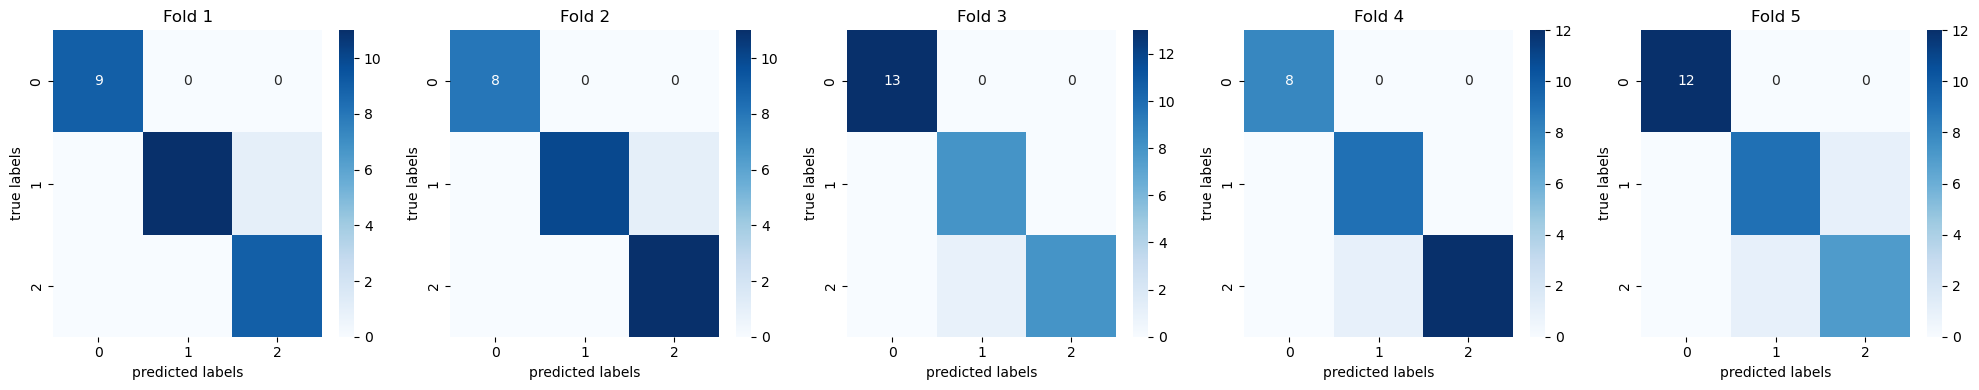

In [67]:
# 10
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Load data
iris = load_iris()
x = iris.data
y = iris.target

# Configure KFold
kf = KFold(n_splits=5, shuffle=True)

# Initialize model
model = LogisticRegression(max_iter=200)

# Prepare to collet confusion matrices
conf_matrices = []

# Perform cross-validation
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(x_train, y_train)
    predictions = model.predict(x_test)

    # Collect confusion matrix
    cm = confusion_matrix(y_test, predictions)
    conf_matrices.append(cm)

# Plot all confusion matrices as a heatmap
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, cm in enumerate(conf_matrices):
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Blues')
    axes[i].set_title(f'Fold {i + 1}')
    axes[i].set_xlabel('predicted labels')
    axes[i].set_ylabel('true labels')

plt.tight_layout()
plt.show()